In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy, pandas, matplotlib.pyplot as mtpy, seaborn as sepy
from pandas import read_csv, crosstab
from plotly import express
from sklearn import ensemble, tree, neighbors, neural_network, naive_bayes, linear_model
from sklearn import metrics, model_selection, pipeline, feature_selection, decomposition, utils, preprocessing
import sklearn
import datetime
from IPython.display import display, HTML

In [2]:
def PCAPRead():
    d1=read_csv("Sampath_PCAP_Data.csv")
    display(HTML(d1.head().to_html()))
    print("Information on Dataset")
    print("Total Captured Packets: {}\nTotal Included Features: {}".format(d1.shape[0],d1.shape[1]))
    return d1

In [3]:
PCP=PCAPRead()

,No.,Time,Source,Destination,Protocol,Length,Info,Absolute_Time,IP_DSCP,Relative_Time,Packet_Number,Packet_Severity,Cumulative_Byte,Time_Delta
0,1,0.000000,142.250.200.3,192.168.8.188,TLSv1.3,436,"Server Hello, Change Cipher Spec, Application Data",03:23:00.472073,CS0,0.000000,1,NaN,436,0.000000
1,2,0.000885,192.168.8.188,142.250.200.3,TLSv1.3,128,"Change Cipher Spec, Application Data",03:23:00.472958,CS0,0.000885,2,NaN,564,0.000885
2,3,0.032592,142.250.200.3,192.168.8.188,TLSv1.3,1024,"Application Data, Application Data",03:23:00.504665,CS0,0.032592,3,NaN,1588,0.031707
3,4,0.075117,192.168.8.188,142.250.200.3,TCP,54,49448 > 443 [ACK] Seq=75 Ack=1353 Win=515 Len=0,03:23:00.547190,CS0,0.075117,4,NaN,1642,0.042525
4,5,0.232239,192.168.8.188,20.189.173.13,TCP,55,49415 > 443 [ACK] Seq=1 Ack=1 Win=511 Len=1 [TCP segment of a reassembled PDU],03:23:00.704312,CS0,0.232239,5,NaN,1697,0.157122


Information on Dataset
Total Captured Packets: 200066
Total Included Features: 14


In [4]:
def PCAP_Cleaning(pcap,pcapn):
    print("====================================================")
    print("           Executing {} Data".format(pcapn))
    print("====================================================")
    print("Data Feature Information\n")
    print(pcap.info())
    print("\nCount of Missing Values in Data(Before Cleaning)\n")
    print(pcap.isnull().sum())
    ttl=sum(pcap.isnull().sum())
    if ttl>0:
        pcap_atr=pcap.dtypes[pcap.dtypes=='object'].index.tolist()
        pcap_nm=pcap.dtypes[pcap.dtypes!='object'].index.tolist()
        for aa in pcap_atr:
            pcap[aa]=pcap[aa].fillna(pcap[aa].mode()[0])
        for an in pcap_nm:
            pcap[an]=pcap[an].fillna(pcap[an].mean())
        print("\nCount of Missing Values in Data(After Cleaning)\n")
        print(pcap.isnull().sum())
    display(HTML(pcap.head().to_html()))
    return pcap

In [5]:
PCPClnd=PCAP_Cleaning(PCP,"PCAP")

           Executing PCAP Data
Data Feature Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200066 entries, 0 to 200065
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   No.              200066 non-null  int64  
 1   Time             200066 non-null  float64
 2   Source           200066 non-null  object 
 3   Destination      200066 non-null  object 
 4   Protocol         200066 non-null  object 
 5   Length           200066 non-null  int64  
 6   Info             200066 non-null  object 
 7   Absolute_Time    200066 non-null  object 
 8   IP_DSCP          199579 non-null  object 
 9   Relative_Time    200066 non-null  float64
 10  Packet_Number    200066 non-null  int64  
 11  Packet_Severity  30280 non-null   object 
 12  Cumulative_Byte  200066 non-null  int64  
 13  Time_Delta       200066 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 21.4+ MB
None

Count of Mi

,No.,Time,Source,Destination,Protocol,Length,Info,Absolute_Time,IP_DSCP,Relative_Time,Packet_Number,Packet_Severity,Cumulative_Byte,Time_Delta
0,1,0.000000,142.250.200.3,192.168.8.188,TLSv1.3,436,"Server Hello, Change Cipher Spec, Application Data",03:23:00.472073,CS0,0.000000,1,Note,436,0.000000
1,2,0.000885,192.168.8.188,142.250.200.3,TLSv1.3,128,"Change Cipher Spec, Application Data",03:23:00.472958,CS0,0.000885,2,Note,564,0.000885
2,3,0.032592,142.250.200.3,192.168.8.188,TLSv1.3,1024,"Application Data, Application Data",03:23:00.504665,CS0,0.032592,3,Note,1588,0.031707
3,4,0.075117,192.168.8.188,142.250.200.3,TCP,54,49448 > 443 [ACK] Seq=75 Ack=1353 Win=515 Len=0,03:23:00.547190,CS0,0.075117,4,Note,1642,0.042525
4,5,0.232239,192.168.8.188,20.189.173.13,TCP,55,49415 > 443 [ACK] Seq=1 Ack=1 Win=511 Len=1 [TCP segment of a reassembled PDU],03:23:00.704312,CS0,0.232239,5,Note,1697,0.157122


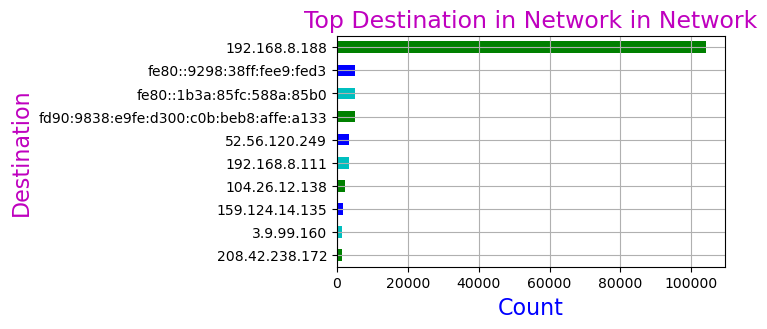

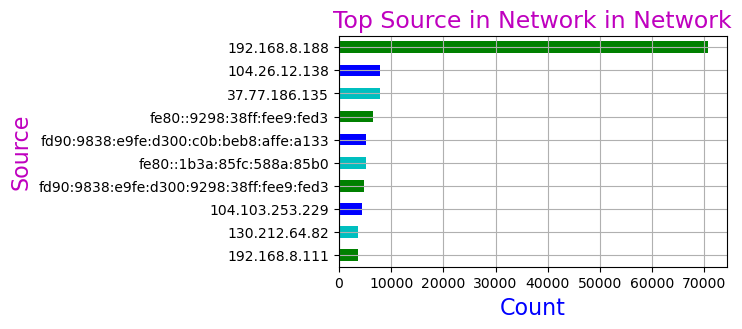

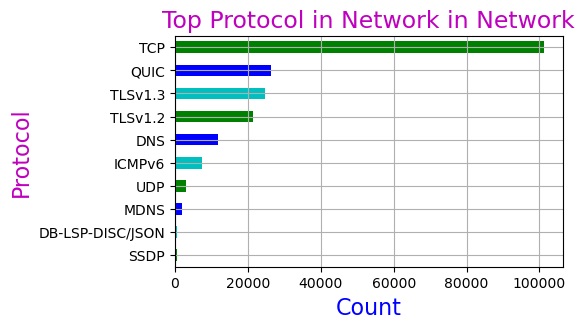

In [6]:
def PCAPViz(pcap,ft):
    pcap[ft].value_counts()[:10][::-1].plot(kind='barh',color=["g","c","b"],figsize=(5,3))
    mtpy.title("Top {} in Network in Network".format(ft.capitalize()),fontsize=17,color="m")
    mtpy.xlabel("Count",fontsize=16,color="b")
    mtpy.ylabel("{}".format(ft.capitalize()),fontsize=16,color="m")
    mtpy.grid()
    mtpy.show()
wrft=["Destination","Source","Protocol"]
for f in wrft:
    PCAPViz(PCPClnd,f)

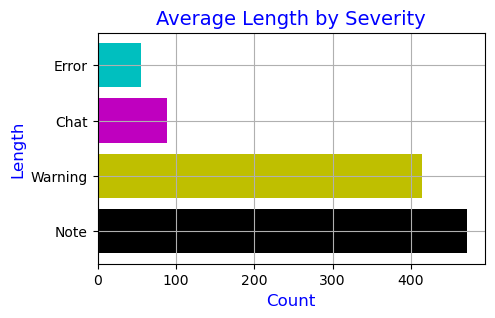

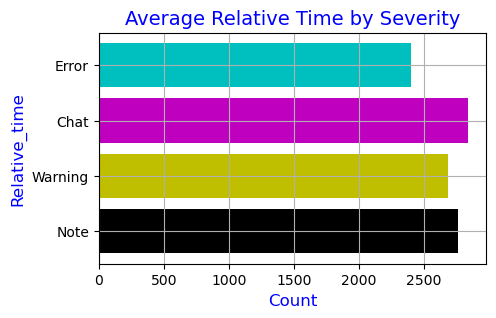

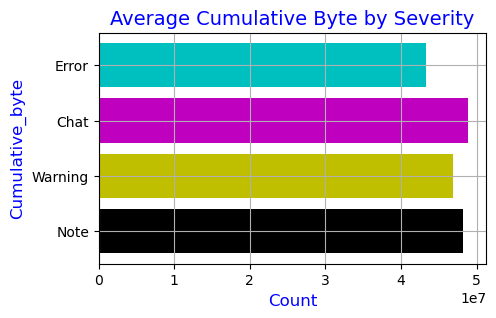

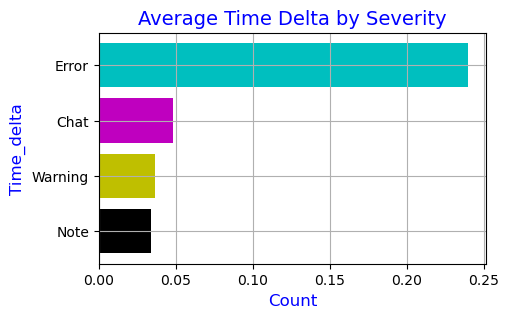

In [7]:
def MeanViz(pcap,ft,ftnm):
    svwr=pcap['Packet_Severity'].unique()
    wrav=[]
    for s in svwr:
        wrav.append(pcap[pcap['Packet_Severity']==s][ft].mean())
    mtpy.figure(figsize=(5,3))
    mtpy.title("Average {} by Severity".format(ftnm),fontsize=14,color="b")
    mtpy.barh(svwr,wrav,color=["c","m","y","k"][::-1])
    mtpy.xlabel("Count",fontsize=12,color="b")
    mtpy.ylabel("{}".format(ft.capitalize()),fontsize=12,color="b")
    mtpy.grid()
    mtpy.show()
WrFts=["Length","Relative_Time","Cumulative_Byte","Time_Delta"]
WrFtsnm=["Length","Relative Time","Cumulative Byte","Time Delta"]
for f in range(len(WrFts)):
    MeanViz(PCPClnd,WrFts[f],WrFtsnm[f])

In [8]:
set_filter=[
    ["Previous segment not captured","Dup ACK","Spurious Retransmission","Fast Retransmission","TCP Previous segment not captured","SCID","DCID"],
    ["Malformed Packet","Unknown Record","Out-Of-Order", "XID","Reassembly error","Reassembly error","New fragment overlaps old data","wpad","QM","SLE=1","CRYPTO"]
]
typcls=["Suspecious","Malicious", "Benign"]
PCPInfo=PCPClnd['Info'].tolist()
data_labels=[]
for n in range(len(PCPInfo)):
    if set_filter[0][0] in PCPInfo[n] or set_filter[0][1] in PCPInfo[n] or set_filter[0][2] in PCPInfo[n] or set_filter[0][3] in PCPInfo[n] or set_filter[0][4] in PCPInfo[n] or set_filter[0][5] in PCPInfo[n] or set_filter[0][6] in PCPInfo[n]:
        data_labels.append(typcls[0])
    elif set_filter[1][0] in PCPInfo[n] or set_filter[1][1] in PCPInfo[n] or set_filter[1][2] in PCPInfo[n] or set_filter[1][3] in PCPInfo[n] or set_filter[1][4] in PCPInfo[n] or set_filter[1][5] in PCPInfo[n] or set_filter[1][6] in PCPInfo[n] or set_filter[1][7] in PCPInfo[n] or set_filter[1][8] in PCPInfo[n] or set_filter[1][9] in PCPInfo[n] or set_filter[1][10] in PCPInfo[n]:
        data_labels.append(typcls[1])
    else:
        data_labels.append(typcls[2])
        
PCPClnd['Class']=data_labels
print(PCPClnd['Class'].value_counts())
PCPClnd.head()

Benign        184886
Suspecious     12595
Malicious       2585
Name: Class, dtype: int64


,No.,Time,Source,Destination,Protocol,Length,Info,Absolute_Time,IP_DSCP,Relative_Time,Packet_Number,Packet_Severity,Cumulative_Byte,Time_Delta,Class
0,1,0.000000,142.250.200.3,192.168.8.188,TLSv1.3,436,"Server Hello, Change Cipher Spec, Application ...",03:23:00.472073,CS0,0.000000,1,Note,436,0.000000,Benign
1,2,0.000885,192.168.8.188,142.250.200.3,TLSv1.3,128,"Change Cipher Spec, Application Data",03:23:00.472958,CS0,0.000885,2,Note,564,0.000885,Benign
2,3,0.032592,142.250.200.3,192.168.8.188,TLSv1.3,1024,"Application Data, Application Data",03:23:00.504665,CS0,0.032592,3,Note,1588,0.031707,Benign
3,4,0.075117,192.168.8.188,142.250.200.3,TCP,54,49448 > 443 [ACK] Seq=75 Ack=1353 Win=515 Len=0,03:23:00.547190,CS0,0.075117,4,Note,1642,0.042525,Benign
4,5,0.232239,192.168.8.188,20.189.173.13,TCP,55,49415 > 443 [ACK] Seq=1 Ack=1 Win=511 Len=1 ...,03:23:00.704312,CS0,0.232239,5,Note,1697,0.157122,Benign


In [9]:
def encodedata(pcap):
    pcap_1=pcap.copy()
    wrct=pcap_1.select_dtypes(include=['object']).columns[:-1]
    trg=pcap_1['Class'].tolist()
    pcap_1_1=pcap_1.drop('Class',axis=1)
    le = preprocessing.LabelEncoder()
    pcap_2=pcap_1_1.apply(le.fit_transform)
    pcap_2=pcap_2.drop('No.',axis=1)
    pcap_2['Class']=trg
    return pcap_2
PCPEnc=encodedata(PCPClnd)
PCPEnc.head(10)

,Time,Source,Destination,Protocol,Length,Info,Absolute_Time,IP_DSCP,Relative_Time,Packet_Number,Packet_Severity,Cumulative_Byte,Time_Delta,Class
0,0,134,282,18,384,88957,0,3,0,0,2,0,18,Benign
1,1,268,145,18,76,86634,1,3,1,1,2,1,903,Benign
2,2,134,282,18,971,86608,2,3,2,2,2,2,22836,Benign
3,3,268,145,15,2,55127,3,3,3,3,2,3,26273,Benign
4,4,268,309,15,3,55101,4,3,4,4,2,4,37491,Benign
5,5,287,282,15,14,2569,5,3,5,5,3,5,16807,Malicious
6,6,268,309,15,3,55099,6,3,6,6,2,6,35196,Benign
7,7,287,282,15,14,2566,7,3,7,7,3,7,12694,Malicious
8,8,143,282,15,2,1929,8,3,8,8,2,8,43436,Benign
9,9,268,154,15,2,51464,9,3,9,9,2,9,111,Benign


In [10]:
def PCAPOut(pcap,n,w,h,col,txtstr):
    arrpcap=numpy.array(pcap.iloc[:,:-1])
    PCAPCP = decomposition.PCA(n_components=n)
    PCAPCP.fit(arrpcap)
    pcvarcmp=["Comp-{}".format(i+1) for i in range(len(PCAPCP.explained_variance_ratio_.tolist()))]
    mtpy.figure(figsize=(w,h))
    mtpy.title("Variance for PCA={}({} Normalization)\nVariance(Maximum): {}".format(n,txtstr,round(max(PCAPCP.explained_variance_ratio_),8)),fontsize=18)
    mtpy.bar(pcvarcmp,PCAPCP.explained_variance_ratio_.tolist(),width=0.5,color=col)
    mtpy.xlabel("Components",fontsize=14)
    mtpy.ylabel("Variance",fontsize=14)
    mtpy.grid()
    mtpy.show()
    return PCAPCP.explained_variance_ratio_

In [11]:
def PcapNorm(pcap):
    prepproc = preprocessing.MinMaxScaler()
    nrm_pcap=prepproc.fit_transform(pcap)
    return nrm_pcap

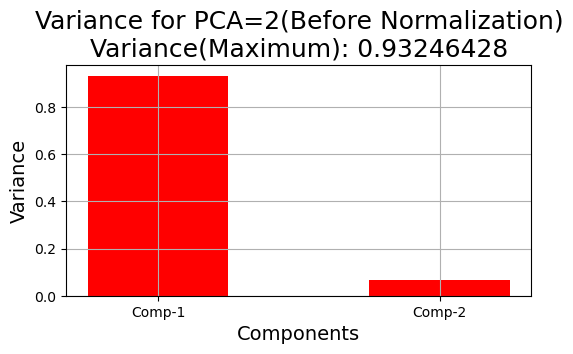

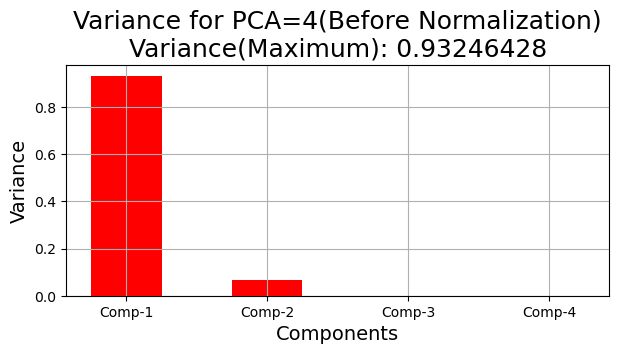

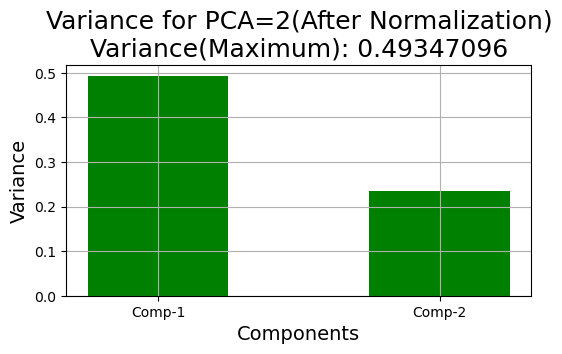

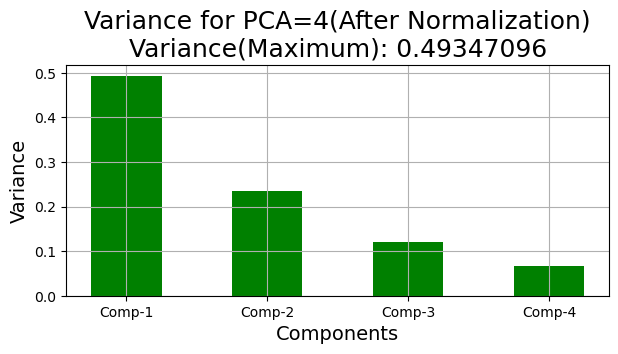

,Time,Source,Destination,Protocol,Length,Info,Absolute_Time,IP_DSCP,Relative_Time,Packet_Number,Packet_Severity,Cumulative_Byte,Time_Delta,Class
0,0.000000,0.227504,0.264789,0.857143,0.290030,0.814222,0.000000,0.6,0.000000,0.000000,0.666667,0.000000,0.000380,Benign
1,0.000007,0.455008,0.136150,0.857143,0.057402,0.792960,0.000007,0.6,0.000007,0.000005,0.666667,0.000005,0.019048,Benign
2,0.000014,0.227504,0.264789,0.857143,0.733384,0.792722,0.000014,0.6,0.000014,0.000010,0.666667,0.000010,0.481701,Benign
3,0.000021,0.455008,0.136150,0.714286,0.001511,0.504576,0.000021,0.6,0.000021,0.000015,0.666667,0.000015,0.554201,Benign
4,0.000028,0.455008,0.290141,0.714286,0.002266,0.504339,0.000028,0.6,0.000028,0.000020,0.666667,0.000020,0.790833,Benign
5,0.000035,0.487267,0.264789,0.714286,0.010574,0.023514,0.000035,0.6,0.000035,0.000025,1.000000,0.000025,0.354526,Malicious
6,0.000042,0.455008,0.290141,0.714286,0.002266,0.504320,0.000042,0.6,0.000042,0.000030,0.666667,0.000030,0.742422,Benign
7,0.000050,0.487267,0.264789,0.714286,0.010574,0.023487,0.000050,0.6,0.000050,0.000035,1.000000,0.000035,0.267766,Malicious
8,0.000057,0.242784,0.264789,0.714286,0.001511,0.017656,0.000057,0.6,0.000057,0.000040,0.666667,0.000040,0.916236,Benign
9,0.000064,0.455008,0.144601,0.714286,0.001511,0.471049,0.000064,0.6,0.000064,0.000045,0.666667,0.000045,0.002341,Benign


In [12]:
PCAPVarValue=[]
PCAPVarValue.append(PCAPOut(PCPEnc.drop('Class',axis=1),2,6,3,"r","Before"))
PCAPVarValue.append(PCAPOut(PCPEnc.drop('Class',axis=1),4,7,3,"r","Before"))

OUTCHK=[]
FLGOUT=[]
for rp in PCAPVarValue:
    for r in rp:
        if r>0.8:
            OUTCHK.append("Outlier in Component-{} with Variance Value {}".format(rp.tolist().index(r)+1,round(r,5)))
            FLGOUT.append(True)
if len(FLGOUT)==2 and True in FLGOUT:
    NormPCP=PcapNorm(PCPEnc.drop('Class',axis=1))
NormPCP=pandas.DataFrame(NormPCP,columns=PCPEnc.drop('Class',axis=1).columns.tolist())
NormPCP['Class']=PCPEnc['Class']
PCAPOut(NormPCP.drop('Class',axis=1),2,6,3,"g","After")
PCAPOut(NormPCP.drop('Class',axis=1),4,7,3,"g","After")
NormPCP.head(10)

In [13]:
def SelectFets(pcap):
    pcap_X=pcap.drop(['Class'],axis=1)
    pcap_Y=pcap['Class']
    
    RFEPcap=feature_selection.RFE(estimator=ensemble.RandomForestClassifier(),n_features_to_select=9, step=0.5)
    RFEPcap.fit(pcap_X, pcap_Y)
    return pcap_X.columns[RFEPcap.get_support()]

In [14]:
FETS=SelectFets(NormPCP)
print("Optimum Features: \n",*FETS, sep="\n")

Optimum Features: 

Source
Destination
Protocol
Length
Info
Absolute_Time
Relative_Time
Packet_Severity
Time_Delta


In [15]:
cnmx=NormPCP['Class'].value_counts().tolist()[0]
pcpcls=NormPCP['Class'].value_counts().index.tolist()
print("Class Labels Before Balancing\n")
print(NormPCP['Class'].value_counts())
DFBlncd=[]
for x in pcpcls:
    df=NormPCP[NormPCP['Class']==x]
    df=utils.resample(df, replace = True, n_samples = int(len(df)*(cnmx/len(df))), random_state = 32)
    DFBlncd.append(df)
NormPCP_Bl=pandas.concat(DFBlncd).reset_index(drop=True)
print("Class Labels After Balancing\n")
print(NormPCP_Bl['Class'].value_counts())
NormPCP_Bl.head(10)

Class Labels Before Balancing

Benign        184886
Suspecious     12595
Malicious       2585
Name: Class, dtype: int64
Class Labels After Balancing

Benign        184886
Suspecious    184886
Malicious     184886
Name: Class, dtype: int64


,Time,Source,Destination,Protocol,Length,Info,Absolute_Time,IP_DSCP,Relative_Time,Packet_Number,Packet_Severity,Cumulative_Byte,Time_Delta,Class
0,0.071099,0.455008,0.705164,0.714286,0.001511,0.461622,0.071099,0.6,0.071099,0.064354,0.666667,0.064354,0.000401,Benign
1,0.548800,0.455008,0.097653,0.714286,0.001511,0.998554,0.548800,0.6,0.548800,0.584445,1.000000,0.584445,0.001371,Benign
2,0.696555,0.249576,0.264789,0.857143,0.118580,0.792712,0.696555,0.6,0.696555,0.713878,0.666667,0.713878,0.002278,Benign
3,0.402595,0.455008,0.624413,0.714286,0.001511,0.622082,0.402595,0.6,0.402595,0.410387,0.666667,0.410387,0.001139,Benign
4,0.330788,0.612903,0.264789,0.714286,0.001511,0.171133,0.330788,0.6,0.330788,0.333257,0.666667,0.333257,0.472209,Benign
5,0.131815,0.042445,0.264789,0.714286,0.001511,0.059330,0.131815,0.6,0.131815,0.118357,0.666667,0.118357,0.194444,Benign
6,0.663246,0.699491,0.264789,0.857143,0.444109,0.792722,0.663246,0.6,0.663246,0.681693,0.666667,0.681693,0.148543,Benign
7,0.644474,0.996604,0.995305,0.333333,0.025680,0.808437,0.644474,0.6,0.644474,0.665849,0.666667,0.665849,0.517708,Benign
8,0.816104,0.988115,0.987793,0.333333,0.061934,0.793014,0.816104,0.6,0.816104,0.843301,0.666667,0.843301,0.000380,Benign
9,0.999568,0.455008,0.327700,0.714286,0.010574,0.981081,0.999568,0.6,0.999568,0.999610,0.666667,0.999610,0.870905,Benign


In [20]:
alldata=[NormPCP,NormPCP_Bl]
PCAP_Pred,PCAP_Target=[NormPCP.drop('Class',axis=1),NormPCP_Bl.drop('Class',axis=1)],[NormPCP['Class'],NormPCP_Bl['Class']]

In [21]:
def DataSegment(PCPPred, PCPTrg):
    X_TR, X_TS, Y_TR, Y_TS=model_selection.train_test_split(PCPPred, PCPTrg, test_size=0.25, random_state=42)
    return X_TR, X_TS, Y_TR, Y_TS

In [28]:
def PCAPDetect(PCPPrd,PCPTrgt,PMDL,PCAPModel,dttyp):
    AllPCPDfs=[]
    for w in range(len(dttyp)):
        print("______________________________________________________________________________________________")
        print("                           Executing {} Data".format(dttyp[w]))
        print("______________________________________________________________________________________________")
        PCPXTr,PCPXTs,PCPYTr,PCPYTs=DataSegment(PCPPrd[w], PCPTrgt[w])
        print("Test Class Distribution: \n",PCPYTs.value_counts())
        traintime, testtime=[],[]
        PCPResVals=[[],[],[],[],[],[]]
        print("_____________________________________________________________________________")
        for i in range(len(PCAPModel)):
            print("                            {} ".format(PMDL[i]))
            print("_____________________________________________________________________________")
            inter_result=[[],[],[],[],[],[]]
            trntime, tsttime=[],[]
            for ts in range(10):
                t1 = datetime.datetime.now() 
                PCAPModel[i].fit(PCPXTr,PCPYTr)
                t2 = datetime.datetime.now()
                delta = t2 - t1
                trtm=delta.total_seconds()
                trntime.append(trtm)
                
                t3 = datetime.datetime.now() 
                TsPrd=PCAPModel[i].predict(PCPXTs)
                t4 = datetime.datetime.now()
                delta = t4 - t3
                tstm=delta.total_seconds()
                tsttime.append(tstm)
                
                TrPrd=PCAPModel[i].predict(PCPXTr)
                inter_result[0].append(round(metrics.accuracy_score(PCPYTs,TsPrd)*100,2))

                prf=metrics.precision_recall_fscore_support(PCPYTs,TsPrd, average='weighted')[:-1]
                inter_result[1].append(round(prf[0],2)*100)
                inter_result[2].append(round(prf[1],2)*100)
                inter_result[3].append(round(prf[2],2)*100)
                cmt=pandas.crosstab(PCPYTs, TsPrd, rownames=['Actual'], colnames=['Detected'], margins=True)
                inter_result[4].append(cmt.iloc[:3,:3])
                inter_result[5].append(metrics.classification_report(PCPYTs, TsPrd))
            mxsln=inter_result[0].index(max(inter_result[0]))
            PCPResVals[0].append(round(metrics.accuracy_score(PCPYTr,TrPrd)*100,2))
            PCPResVals[1].append(inter_result[0][mxsln])
            PCPResVals[2].append(inter_result[1][mxsln])
            PCPResVals[3].append(inter_result[2][mxsln])
            PCPResVals[4].append(inter_result[3][mxsln])
            traintime.append(numpy.array(trntime).mean())
            testtime.append(numpy.array(tsttime).mean())
            ov_fit_mdl=round(abs(round(metrics.accuracy_score(PCPYTr,TrPrd)*100,2)-inter_result[0][mxsln]),2)
            PCPResVals[5].append(ov_fit_mdl)
            mtpy.figure(figsize=(5,3))
            mtpy.title("{} Confusion Matrix".format(PMDL[i]), fontsize=15,color="b")
            sepy.heatmap(inter_result[4][mxsln],fmt="d",annot=True,cmap="plasma")
            mtpy.show()
            print("\nTest Accuracy: {}%\n".format(inter_result[0][mxsln]))
            print("Train Accuracy: {}%\n".format(round(metrics.accuracy_score(PCPYTr,TrPrd)*100,2)))
            print("Training Time: {} Seconds\nTesting Time: {} Seconds".format(numpy.array(trntime).mean(),numpy.array(tsttime).mean()))
            print("\nClassification Report for {} \n\n{}".format(PMDL[i],inter_result[5][mxsln]))
            print("_____________________________________________________________________________")

        DFPCAP=pandas.DataFrame({
            "Classifier":PMDL,
            "Accuracy_Train":PCPResVals[0],
            "Accuracy_Test":PCPResVals[1],
            "Precision_Test":PCPResVals[2],
            "Recall_Test":PCPResVals[3],
            "F1-Score_Test":PCPResVals[4],
            "Overfit Model":PCPResVals[5],
            "Training Time":traintime,
            "Test Time":testtime
        })
        bar_col=["r","b","g","m","y"]
        for pp in DFPCAP.columns.tolist()[1:]:
            PCTmp=DFPCAP.sort_values(by=pp,ascending=True)
            mtpy.figure(figsize=(6,4))
            mtpy.title("Comparison of {}".format(pp),fontsize=18,color="b")
            mtpy.barh(PCTmp['Classifier'],PCTmp[pp],color=bar_col)
            mtpy.ylabel("Classifier",fontsize=16,color="b")
            mtpy.xlabel("{}".format(pp),fontsize=16,color="b")
            for slx, vl in enumerate(PCTmp["{}".format(pp)]):
                mtpy.text(vl, slx, str(vl))
            mtpy.grid()
            mtpy.show()
        DFPCAP1=DFPCAP.sort_values(by='Accuracy_Test',ascending=False)
        DFPCAP1.to_csv("Result_{}.csv".format(dttyp[w]))
        display(HTML(DFPCAP1.to_html()))
        AllPCPDfs.append(DFPCAP1)
    return AllPCPDfs

______________________________________________________________________________________________
                           Executing Imbalanced Data
______________________________________________________________________________________________
Test Class Distribution: 
 Benign        46135
Suspecious     3233
Malicious       649
Name: Class, dtype: int64
_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


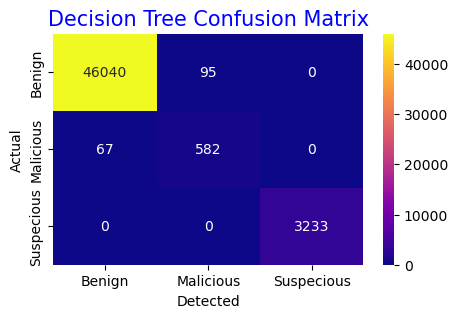


Test Accuracy: 99.68%

Train Accuracy: 100.0%

Training Time: 0.6678753 Seconds
Testing Time: 0.006542399999999999 Seconds

Classification Report for Decision Tree 

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     46135
   Malicious       0.86      0.90      0.88       649
  Suspecious       1.00      1.00      1.00      3233

    accuracy                           1.00     50017
   macro avg       0.95      0.96      0.96     50017
weighted avg       1.00      1.00      1.00     50017

_____________________________________________________________________________
                            K-Nearest Neighbour 
_____________________________________________________________________________


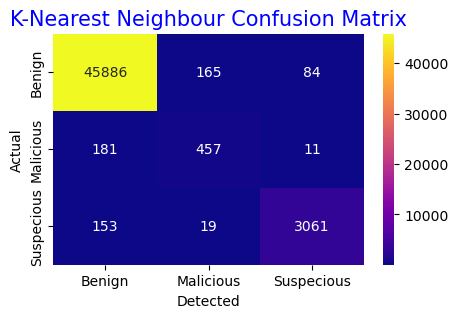


Test Accuracy: 98.77%

Train Accuracy: 99.25%

Training Time: 0.4256194 Seconds
Testing Time: 5.742130900000001 Seconds

Classification Report for K-Nearest Neighbour 

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99     46135
   Malicious       0.71      0.70      0.71       649
  Suspecious       0.97      0.95      0.96      3233

    accuracy                           0.99     50017
   macro avg       0.89      0.88      0.89     50017
weighted avg       0.99      0.99      0.99     50017

_____________________________________________________________________________
                            Random Forest 
_____________________________________________________________________________


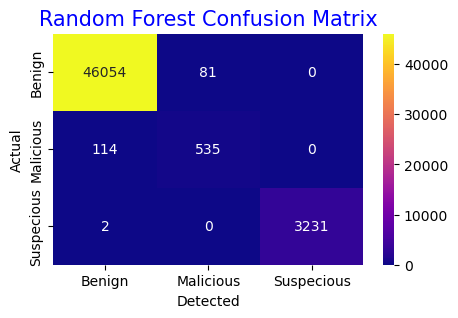


Test Accuracy: 99.61%

Train Accuracy: 100.0%

Training Time: 17.6263532 Seconds
Testing Time: 0.29213009999999995 Seconds

Classification Report for Random Forest 

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     46135
   Malicious       0.87      0.82      0.85       649
  Suspecious       1.00      1.00      1.00      3233

    accuracy                           1.00     50017
   macro avg       0.96      0.94      0.95     50017
weighted avg       1.00      1.00      1.00     50017

_____________________________________________________________________________
                            Naive Bayes 
_____________________________________________________________________________


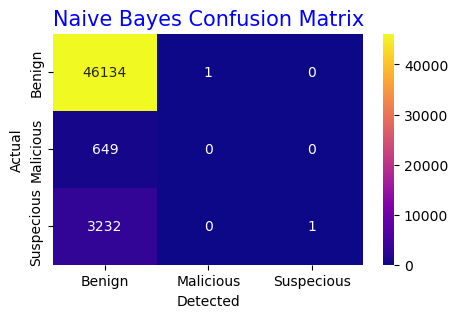


Test Accuracy: 92.24%

Train Accuracy: 92.47%

Training Time: 0.330639 Seconds
Testing Time: 0.011636699999999998 Seconds

Classification Report for Naive Bayes 

              precision    recall  f1-score   support

      Benign       0.92      1.00      0.96     46135
   Malicious       0.00      0.00      0.00       649
  Suspecious       1.00      0.00      0.00      3233

    accuracy                           0.92     50017
   macro avg       0.64      0.33      0.32     50017
weighted avg       0.92      0.92      0.89     50017

_____________________________________________________________________________


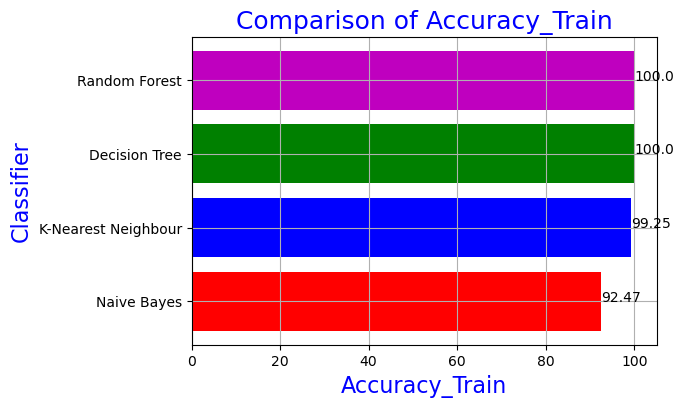

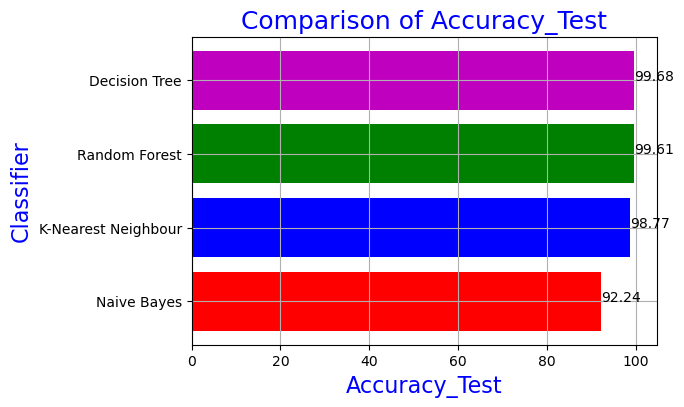

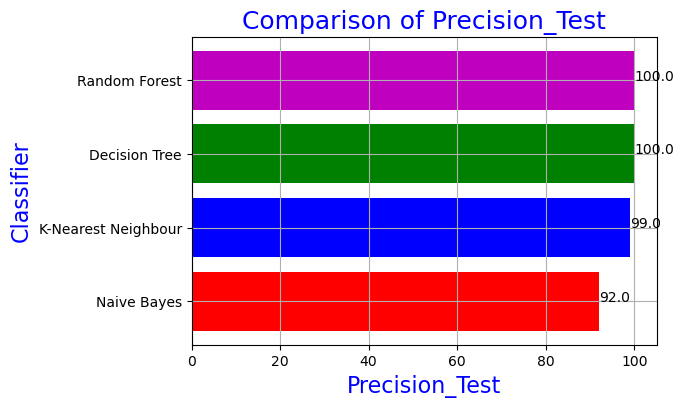

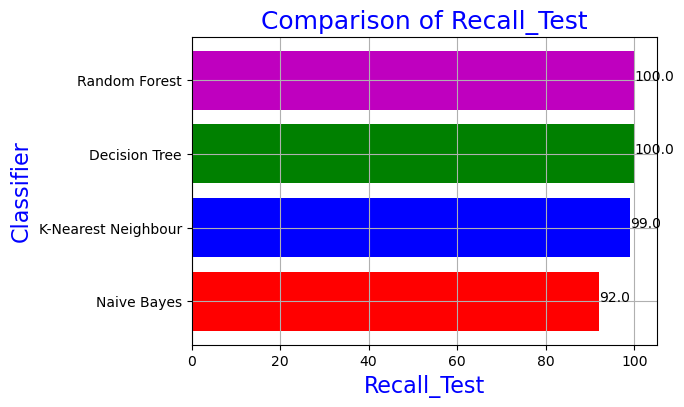

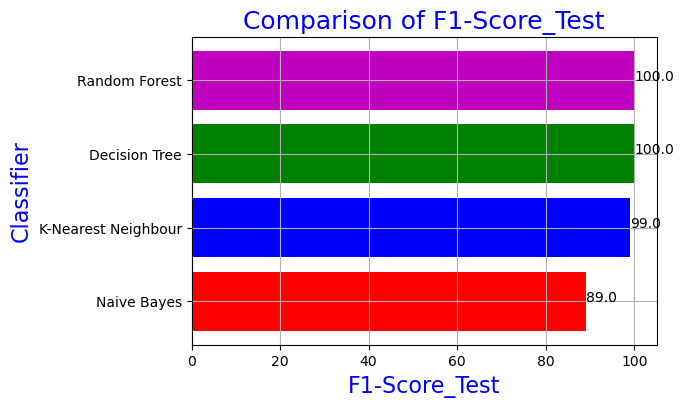

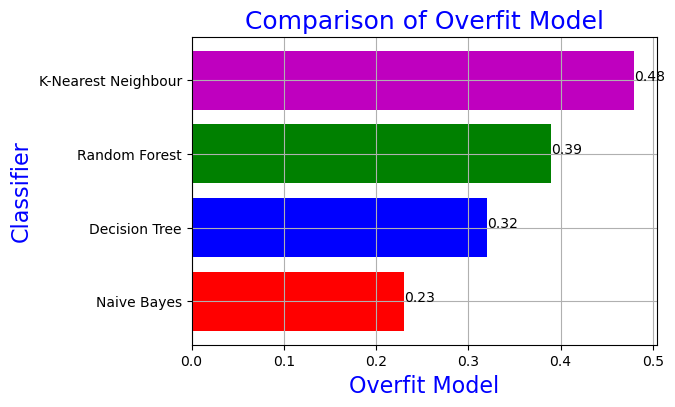

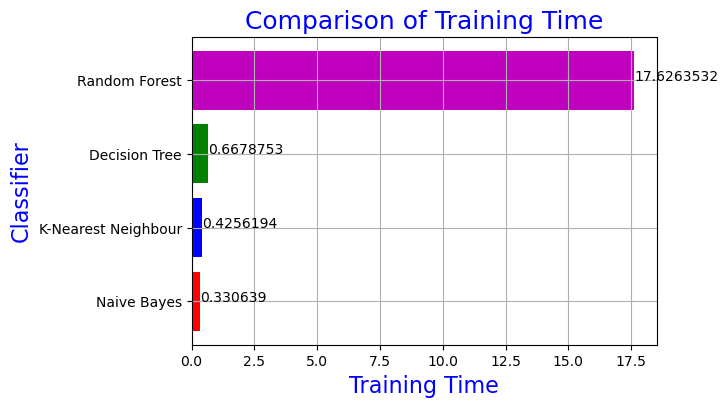

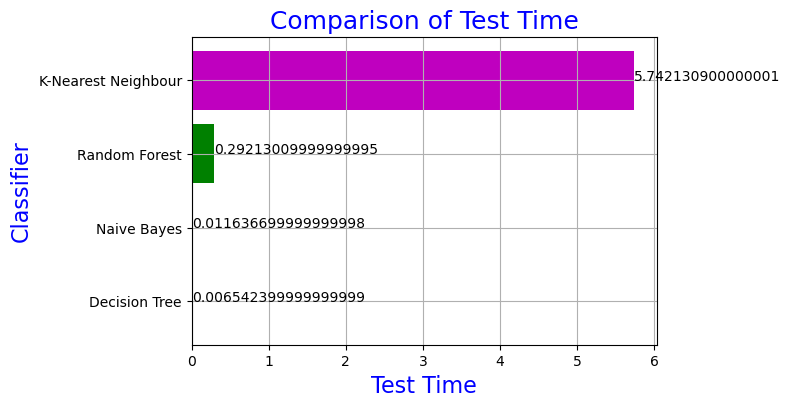

,Classifier,Accuracy_Train,Accuracy_Test,Precision_Test,Recall_Test,F1-Score_Test,Overfit Model,Training Time,Test Time
0,Decision Tree,100.00,99.68,100.0,100.0,100.0,0.32,0.667875,0.006542
2,Random Forest,100.00,99.61,100.0,100.0,100.0,0.39,17.626353,0.292130
1,K-Nearest Neighbour,99.25,98.77,99.0,99.0,99.0,0.48,0.425619,5.742131
3,Naive Bayes,92.47,92.24,92.0,92.0,89.0,0.23,0.330639,0.011637


______________________________________________________________________________________________
                           Executing Balanced Data
______________________________________________________________________________________________
Test Class Distribution: 
 Malicious     46396
Benign        46209
Suspecious    46060
Name: Class, dtype: int64
_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


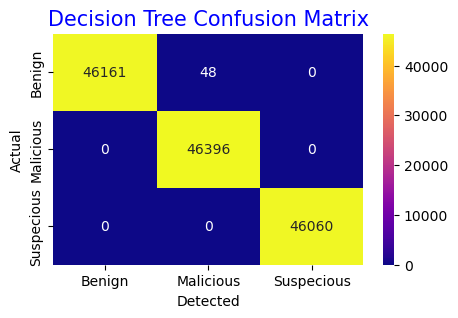


Test Accuracy: 99.97%

Train Accuracy: 100.0%

Training Time: 2.7286373 Seconds
Testing Time: 0.0237319 Seconds

Classification Report for Decision Tree 

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     46209
   Malicious       1.00      1.00      1.00     46396
  Suspecious       1.00      1.00      1.00     46060

    accuracy                           1.00    138665
   macro avg       1.00      1.00      1.00    138665
weighted avg       1.00      1.00      1.00    138665

_____________________________________________________________________________
                            K-Nearest Neighbour 
_____________________________________________________________________________


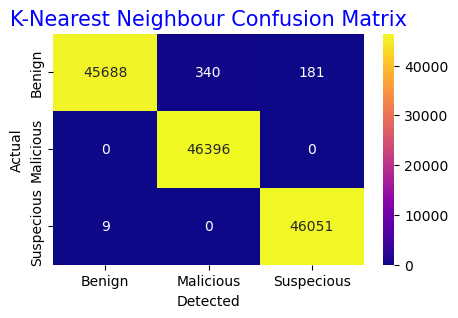


Test Accuracy: 99.62%

Train Accuracy: 99.75%

Training Time: 1.5645865 Seconds
Testing Time: 16.8822951 Seconds

Classification Report for K-Nearest Neighbour 

              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99     46209
   Malicious       0.99      1.00      1.00     46396
  Suspecious       1.00      1.00      1.00     46060

    accuracy                           1.00    138665
   macro avg       1.00      1.00      1.00    138665
weighted avg       1.00      1.00      1.00    138665

_____________________________________________________________________________
                            Random Forest 
_____________________________________________________________________________


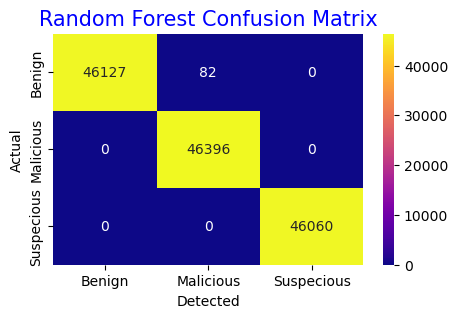


Test Accuracy: 99.94%

Train Accuracy: 100.0%

Training Time: 53.87677349999999 Seconds
Testing Time: 1.1105158 Seconds

Classification Report for Random Forest 

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     46209
   Malicious       1.00      1.00      1.00     46396
  Suspecious       1.00      1.00      1.00     46060

    accuracy                           1.00    138665
   macro avg       1.00      1.00      1.00    138665
weighted avg       1.00      1.00      1.00    138665

_____________________________________________________________________________
                            Naive Bayes 
_____________________________________________________________________________


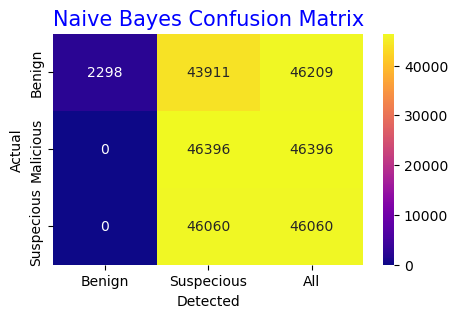


Test Accuracy: 34.87%

Train Accuracy: 35.02%

Training Time: 0.997733 Seconds
Testing Time: 0.03147019999999999 Seconds

Classification Report for Naive Bayes 

              precision    recall  f1-score   support

      Benign       1.00      0.05      0.09     46209
   Malicious       0.00      0.00      0.00     46396
  Suspecious       0.34      1.00      0.50     46060

    accuracy                           0.35    138665
   macro avg       0.45      0.35      0.20    138665
weighted avg       0.45      0.35      0.20    138665

_____________________________________________________________________________


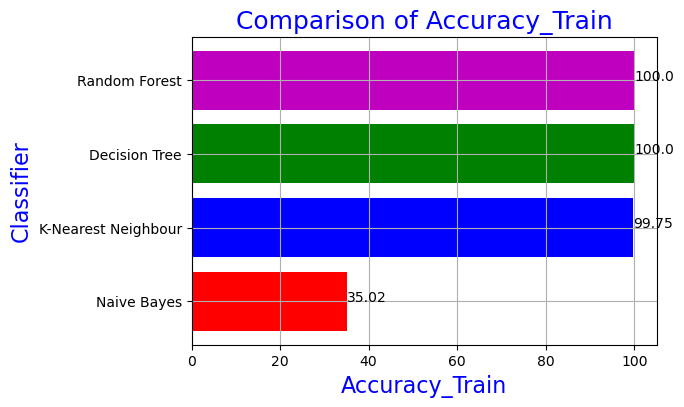

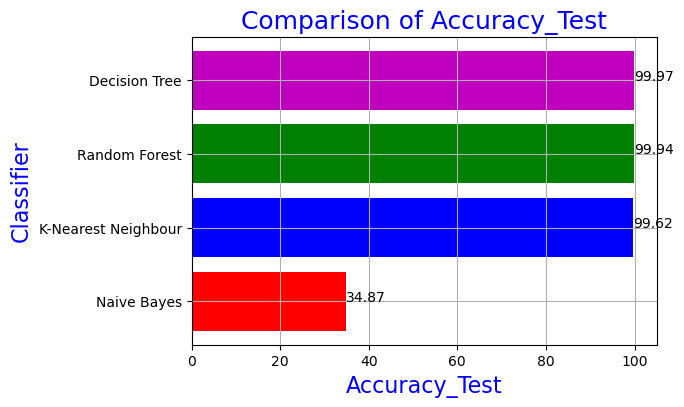

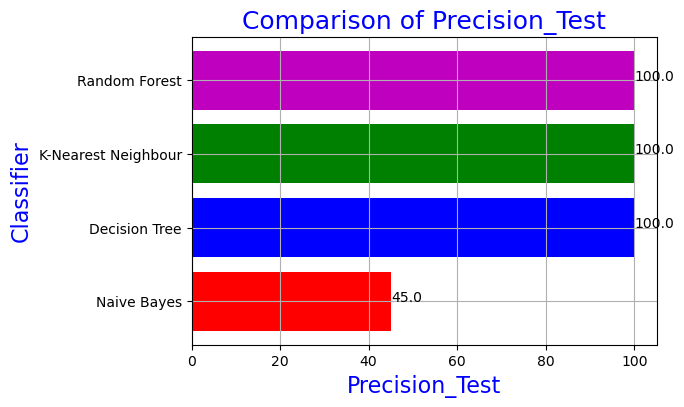

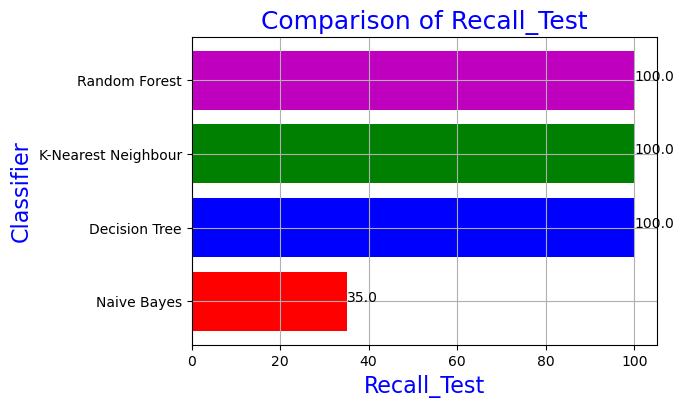

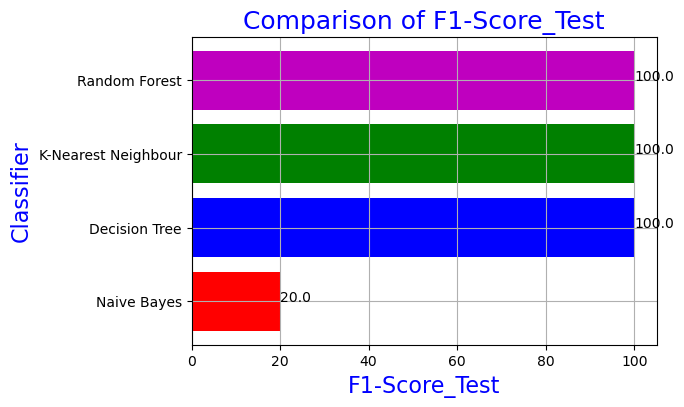

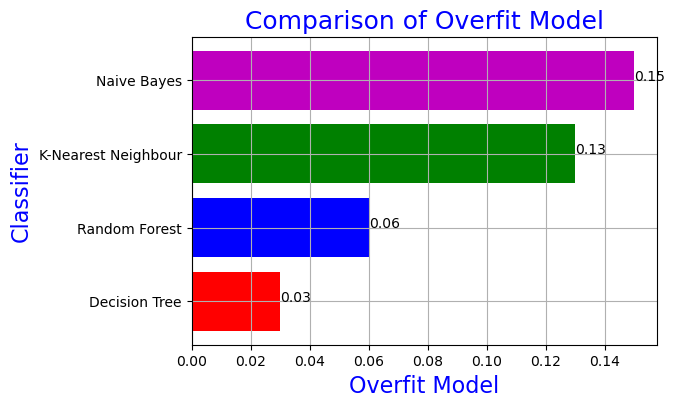

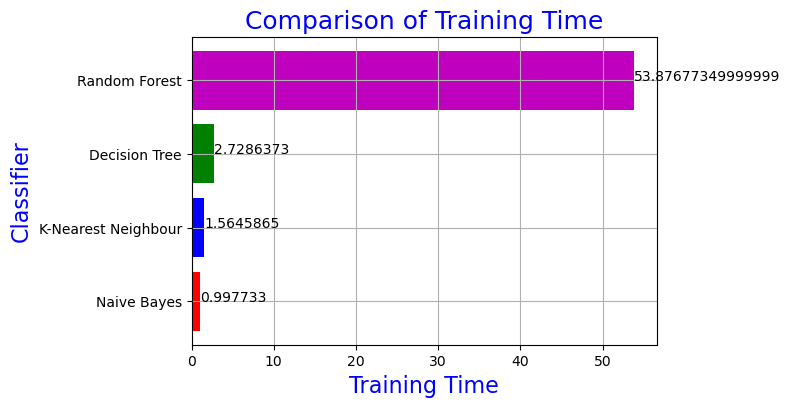

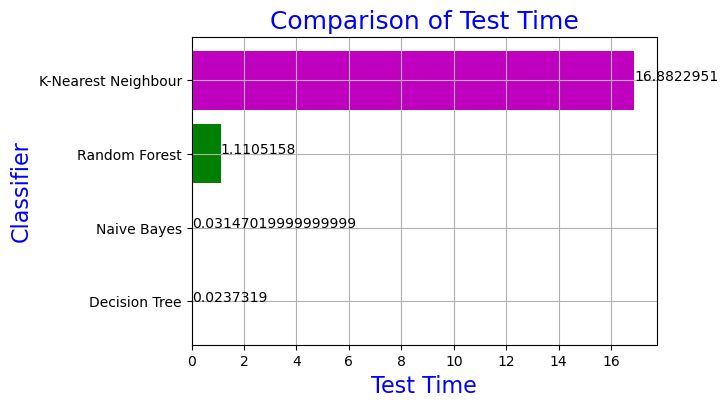

,Classifier,Accuracy_Train,Accuracy_Test,Precision_Test,Recall_Test,F1-Score_Test,Overfit Model,Training Time,Test Time
0,Decision Tree,100.00,99.97,100.0,100.0,100.0,0.03,2.728637,0.023732
2,Random Forest,100.00,99.94,100.0,100.0,100.0,0.06,53.876773,1.110516
1,K-Nearest Neighbour,99.75,99.62,100.0,100.0,100.0,0.13,1.564587,16.882295
3,Naive Bayes,35.02,34.87,45.0,35.0,20.0,0.15,0.997733,0.031470


In [29]:
PCAPModel=[
    pipeline.make_pipeline(preprocessing.MinMaxScaler(),tree.DecisionTreeClassifier()),
    pipeline.make_pipeline(preprocessing.MinMaxScaler(),neighbors.KNeighborsClassifier()),
    pipeline.make_pipeline(preprocessing.MinMaxScaler(),ensemble.RandomForestClassifier()),
    pipeline.make_pipeline(preprocessing.MinMaxScaler(),naive_bayes.BernoulliNB())
    ]
PMDL=[
    "Decision Tree",
    "K-Nearest Neighbour",
    "Random Forest",
    "Naive Bayes"
    ]

AllResults=PCAPDetect(PCAP_Pred,PCAP_Target,PMDL,PCAPModel,['Imbalanced','Balanced'])